In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
sys.path.append("../../../")

from rnns_architectures.pos_hoc import *

sys.path.append("../")
import utils_plots

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pickle
import random, os, json
import time

import matplotlib.pyplot as plt

2025-01-11 23:52:27.168167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-11 23:52:27.678006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# RESULTS (PERFORMANCE)

# GRU

In [2]:
directory = './Results_GRU'
def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

y_pred_by_split = {}

for i in [1, 2, 3]:
    split_filename = os.path.join(directory, f'split_{i}', f'y_pred_split_{i}.pkl')
    y_pred_by_split[str(i)] = load_from_pickle(split_filename)

In [3]:
all_metrics = []
norm = 'robustNorm'
n_time_steps = 10

for i in [1, 2, 3]: 
    y_test = pd.read_csv("../../../DATA/BANK/s" + str(i) + "/y_test_tensor_"+norm+".csv")[['individualMRGerm']].values
    y_test = y_test.reshape(y_test.shape[0] // n_time_steps, n_time_steps)
    y_test_df = pd.DataFrame(y_test)
    
    y_pred = y_pred_by_split[str(i)].squeeze()
    y_pred_df = pd.DataFrame(y_pred)

    df_metrics = utils_plots.get_metrics_over_time(n_time_steps, y_test_df, y_pred_df)
    all_metrics.append(df_metrics)

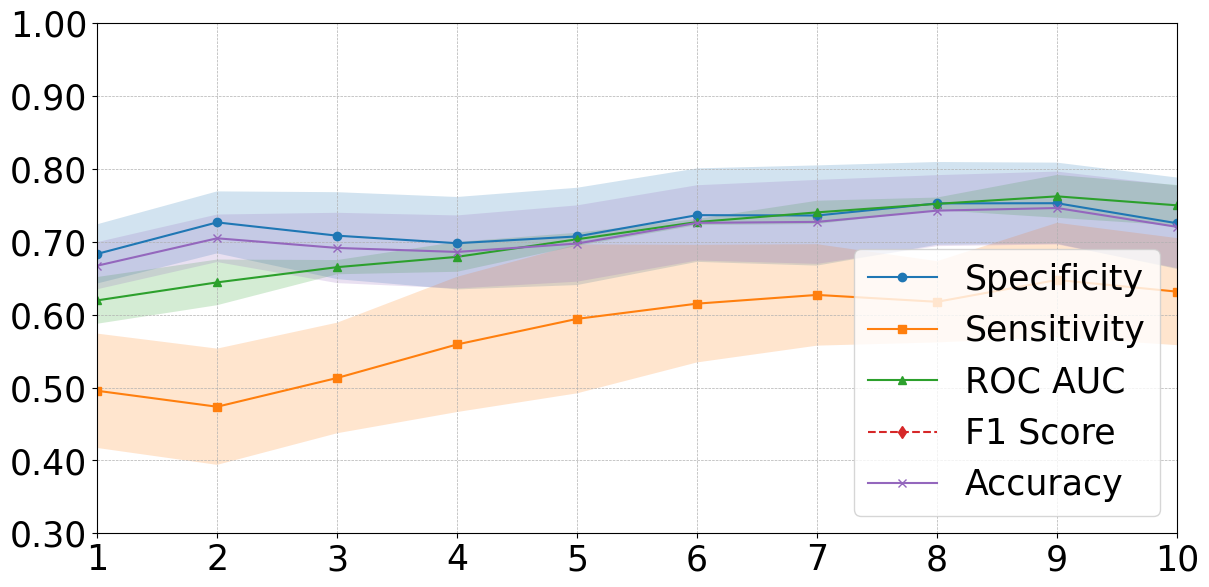

In [4]:
save_img = False
utils_plots.plot1_metrics_over_time(all_metrics, n_time_steps, '../Figures/POST-HOC/Performance_GRU.pdf', save_img)

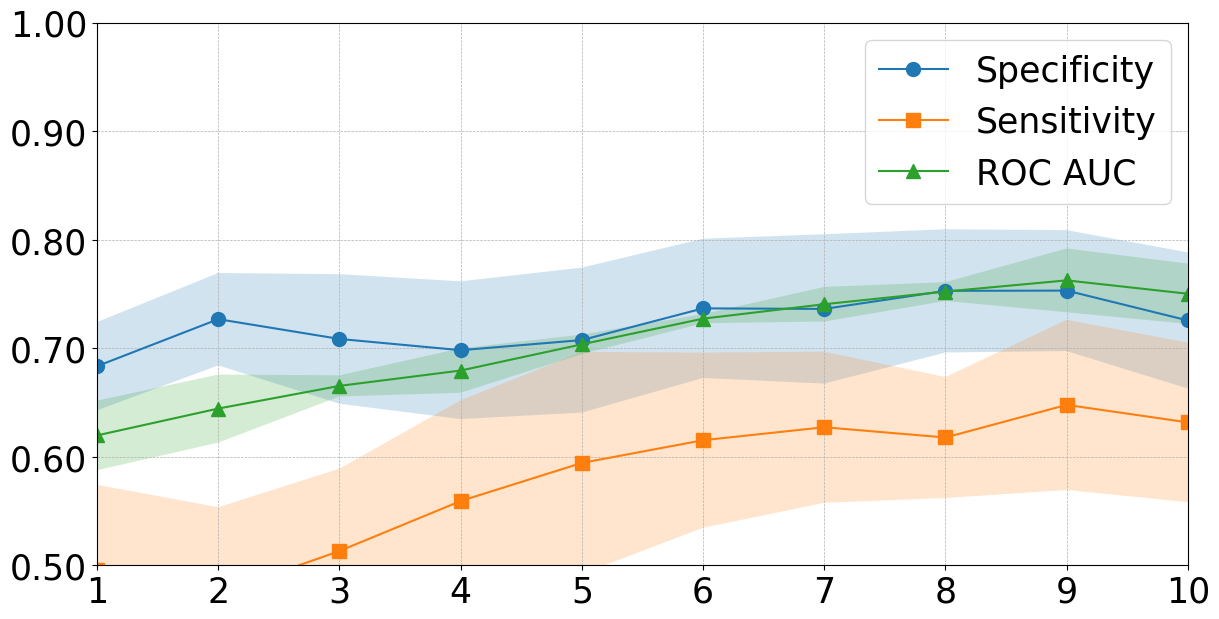

In [5]:
save_img = True
utils_plots.plot2_metrics_over_time(all_metrics, n_time_steps, '../Figures/POST-HOC/Performance_GRU.pdf', save_img)

## Save results (metrics)

In [6]:
metrics_GRU = pd.concat(all_metrics)
metrics_GRU.to_csv('./Results_GRU/metrics_GRU.csv', index=False)

# LSTM

In [7]:
directory = './Results_LSTM'
def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

y_pred_by_split = {}

for i in [1, 2, 3]:
    split_filename = os.path.join(directory, f'split_{i}', f'y_pred_split_{i}.pkl')
    y_pred_by_split[str(i)] = load_from_pickle(split_filename)

In [8]:
all_metrics = []
norm = 'robustNorm'
n_time_steps = 10

for i in [1, 2, 3]: 
    y_test = pd.read_csv("../../../DATA/BANK/s" + str(i) + "/y_test_tensor_"+norm+".csv")[['individualMRGerm']].values
    y_test = y_test.reshape(y_test.shape[0] // n_time_steps, n_time_steps)
    y_test_df = pd.DataFrame(y_test)
    
    y_pred = y_pred_by_split[str(i)].squeeze()
    y_pred_df = pd.DataFrame(y_pred)

    df_metrics = utils_plots.get_metrics_over_time(n_time_steps, y_test_df, y_pred_df)
    all_metrics.append(df_metrics)

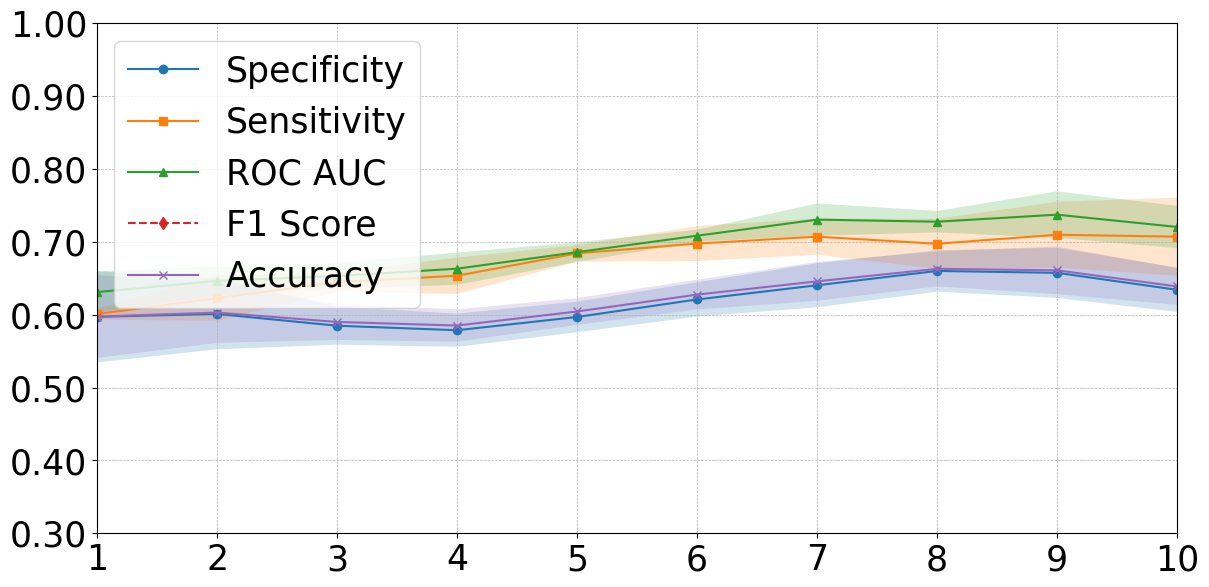

In [9]:
save_img = False
utils_plots.plot1_metrics_over_time(all_metrics, n_time_steps, '../Figures/POST-HOC/Performance_LSTM.pdf', save_img)

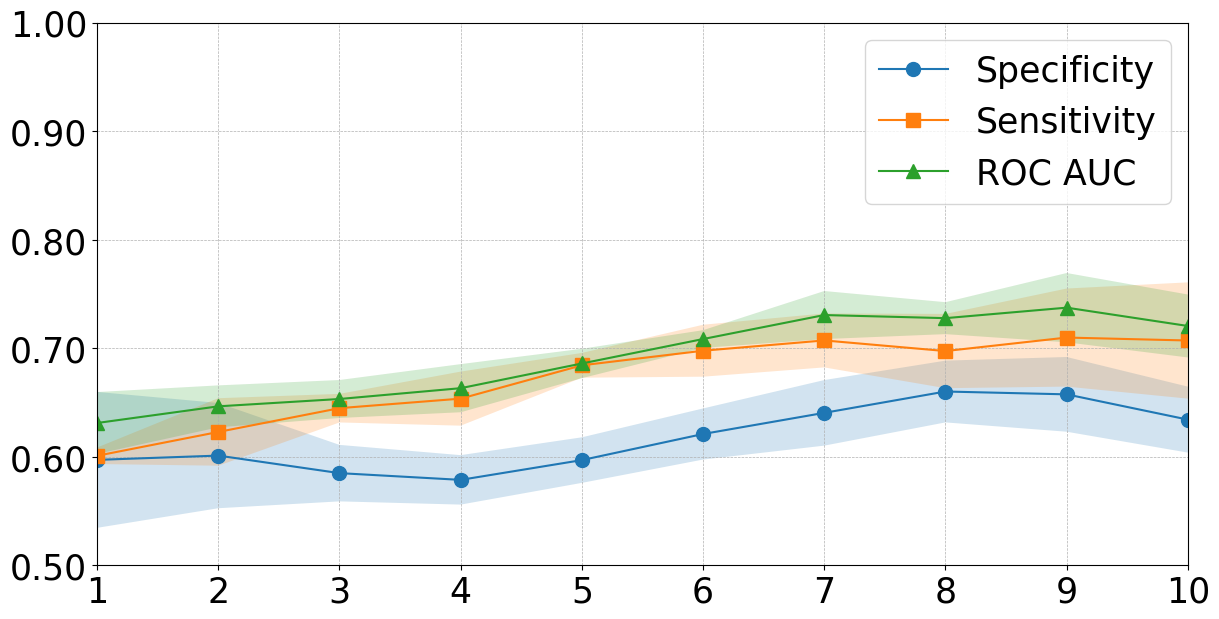

In [10]:
save_img = True
utils_plots.plot2_metrics_over_time(all_metrics, n_time_steps, '../Figures/POST-HOC/Performance_LSTM.pdf', save_img)

In [11]:
metrics_GRU = pd.concat(all_metrics)
metrics_GRU.to_csv('./Results_LSTM/metrics_LSTM.csv', index=False)

# VANILLA

In [12]:
directory = './Results_Vanilla'
def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

y_pred_by_split = {}

for i in [1, 2, 3]:
    split_filename = os.path.join(directory, f'split_{i}', f'y_pred_split_{i}.pkl')
    y_pred_by_split[str(i)] = load_from_pickle(split_filename)

In [13]:
all_metrics = []
norm = 'robustNorm'
n_time_steps = 10

for i in [1, 2, 3]: 
    y_test = pd.read_csv("../../../DATA/BANK/s" + str(i) + "/y_test_tensor_"+norm+".csv")[['individualMRGerm']].values
    y_test = y_test.reshape(y_test.shape[0] // n_time_steps, n_time_steps)
    y_test_df = pd.DataFrame(y_test)
    
    y_pred = y_pred_by_split[str(i)].squeeze()
    y_pred_df = pd.DataFrame(y_pred)

    df_metrics = utils_plots.get_metrics_over_time(n_time_steps, y_test_df, y_pred_df)
    all_metrics.append(df_metrics)

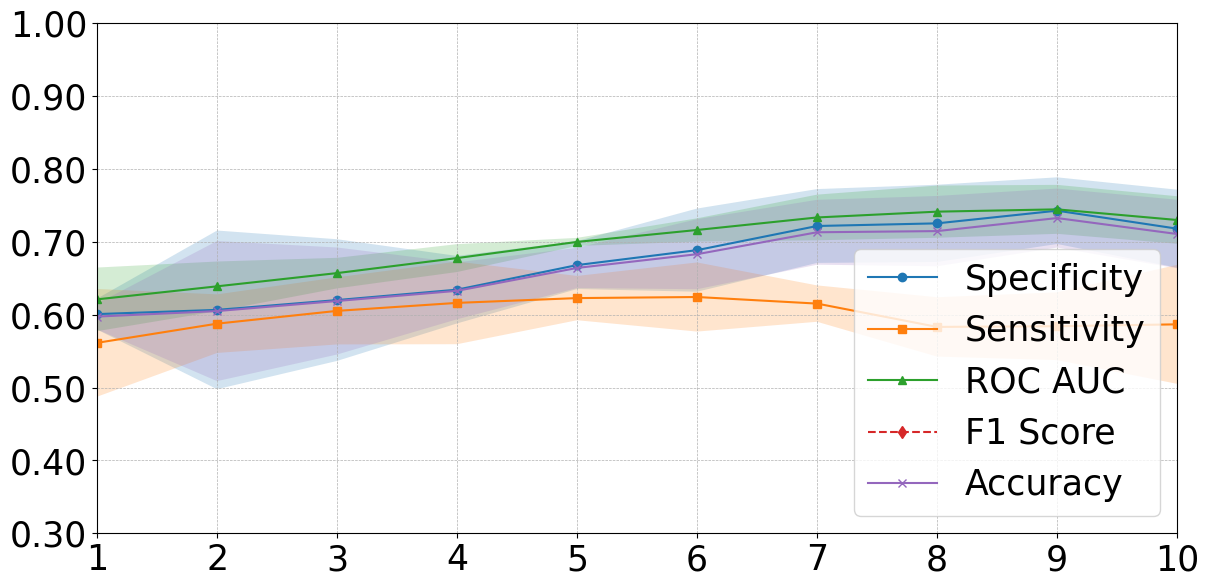

In [14]:
save_img = False
utils_plots.plot1_metrics_over_time(all_metrics, n_time_steps, '../Figures/POST-HOC/Performance_Vanilla.pdf', save_img)

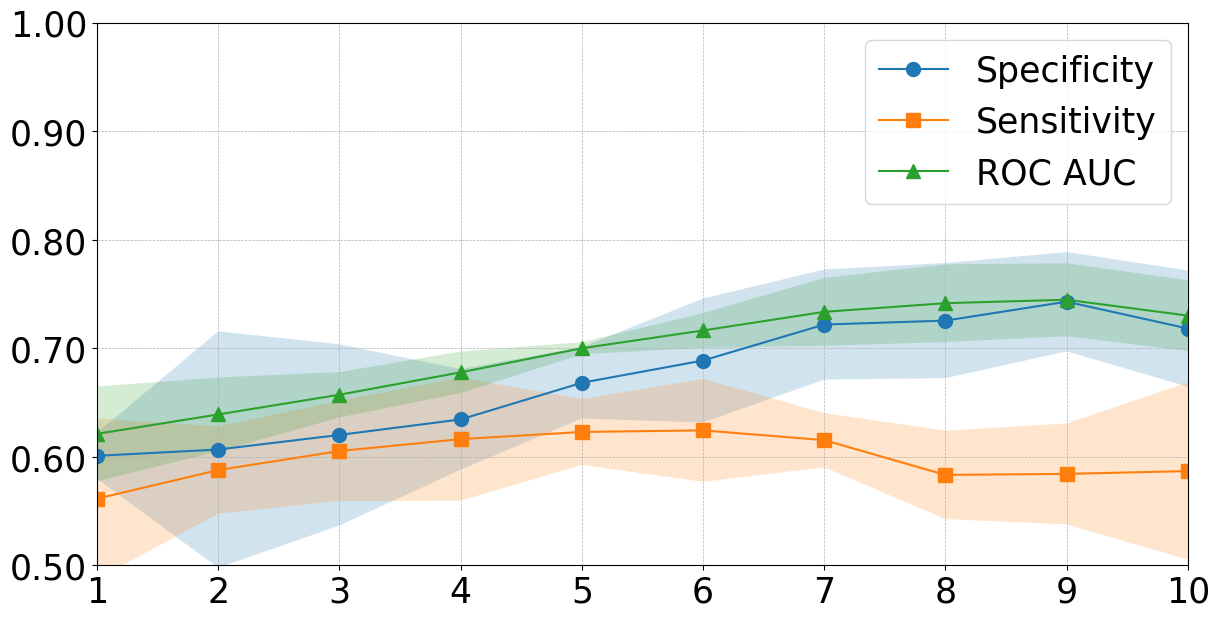

In [15]:
save_img = True
utils_plots.plot2_metrics_over_time(all_metrics, n_time_steps, '../Figures/POST-HOC/Performance_Vanilla.pdf', save_img)

In [16]:
metrics_GRU = pd.concat(all_metrics)
metrics_GRU.to_csv('./Results_Vanilla/metrics_Vanilla.csv', index=False)